# **GRADIENT BOOSTING REGRESSOR WITH PYTHON LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
df = pd.read_csv('/content/salary_data_cleaned.csv')

In [3]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'math', 'engineering', 'data analysis', 'AI'],
      dtype='object')

In [4]:
df_model=df[['Rating','Location','Size','Type of ownership','Industry','Sector','Revenue','hourly','employer_provided','avg_salary',
       'same_state','age','python_yn','spark','aws','excel','Job Title','math', 'engineering', 'data analysis', 'AI']]

In [5]:
# Creating dummy data

df_dum = pd.get_dummies(df_model)

In [6]:
X=df_dum.drop('avg_salary', axis=1)
y=df_dum.avg_salary.values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [8]:
gbm = GradientBoostingRegressor()
gbm = gbm.fit(X_train, y_train)
Y_pred = gbm.predict(X_test)

In [9]:
n_estimators=150
max_depth=5
loss='ls'

In [10]:
gbm_best_params = GradientBoostingRegressor(n_estimators=150, max_depth=5, loss='ls')

**PERFORMANCE METRICS**

In [11]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

print("Mean Squared Error :",mean_squared_error(y_test,Y_pred))
print("Mean Absolute Error :",mean_absolute_error(y_test,Y_pred))
print("Root Mean Squared Error :",mean_squared_error(y_test,Y_pred,squared=False))

coeffofdet = r2_score(y_test, gbm.predict(X_test))
print("The Coefficient Of Determination on test set: {:.4f}".format(coeffofdet))
mape = (100 / len(y_test)) * np.sum(np.abs((y_test - gbm.predict(X_test)) / y_test))

mape = (100 / len(y_test)) * np.sum(np.abs((y_test - gbm.predict(X_test)) / y_test))
print("The Mean Absolute Percentage Error on test set: {:.4f}".format(mape))

Mean Squared Error : 774.5277953395965
Mean Absolute Error : 22.070001065678767
Root Mean Squared Error : 27.8303394758238
The Coefficient Of Determination on test set: 0.5261
The Mean Absolute Percentage Error on test set: 24.3793


In [12]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

X, y = make_regression(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
reg.predict(X_test[1:2])

array([-61.05212593])

In [13]:
reg.score(X_test, y_test)

0.4403245677708285

In [14]:
#Early Stopping
df_dum = pd.get_dummies(df_model)
X=df_dum.drop('avg_salary', axis=1)
y=df_dum.avg_salary.values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
import time

params = dict(n_estimators=1000, max_depth=5, learning_rate=0.1, random_state=42)

gbm_full = GradientBoostingRegressor(**params)
gbm_early_stopping = GradientBoostingRegressor(
    **params,
    validation_fraction=0.1,
    n_iter_no_change=10,
)

start_time = time.time()
gbm_full.fit(X_train, y_train)
training_time_full = time.time() - start_time
n_estimators_full = gbm_full.n_estimators_

print("Training time used by model without early stopping : ", training_time_full)
print("n estimators used by model without early stopping :  ", n_estimators_full)

start_time = time.time()
gbm_early_stopping.fit(X_train, y_train)
training_time_early_stopping = time.time() - start_time
estimators_early_stopping = gbm_early_stopping.n_estimators_

print("Training time used by model with early stopping : ", training_time_early_stopping)
print("n estimators used by model with early stopping :  ", estimators_early_stopping)


Training time used by model without early stopping :  7.516716480255127
n estimators used by model without early stopping :   1000
Training time used by model with early stopping :  1.3676550388336182
n estimators used by model with early stopping :   150


In [16]:
#Evaluating overfitting and underfitting of model
df_model = df[['Rating','Location','Size','Type of ownership','Industry','Sector','Revenue','hourly','employer_provided','avg_salary',
               'same_state','age','python_yn','spark','aws','excel','Job Title','math', 'engineering', 'data analysis', 'AI']]

df_dum = pd.get_dummies(df_model)
X = df_dum.drop('avg_salary', axis=1)
y = df_dum['avg_salary'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbm = GradientBoostingRegressor()
gbm = gbm.fit(X_train, y_train)
y_pred_train = gbm.predict(X_train)
y_pred_test = gbm.predict(X_test)

# Mean Squared Error for Train and Test
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"Gradient Boosting Regressor - Train MSE: {mse_train}, Test MSE: {mse_test}")

Gradient Boosting Regressor - Train MSE: 431.0049492543312, Test MSE: 772.0659049904677


In [17]:
from sklearn.metrics import mean_squared_error

train_errors = []
test_errors = []
values = range(1, 21)  # Example range for tree depths

for i in values:
    # Configure the model
    model = GradientBoostingRegressor(max_depth=i, random_state=42)
    # Fit model on the training dataset
    model.fit(X_train, y_train)
    # Evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_mse = mean_squared_error(y_train, train_yhat)
    train_errors.append(train_mse)
    # Evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_mse = mean_squared_error(y_test, test_yhat)
    test_errors.append(test_mse)
    # Summarize progress
    print(f'>{i}, train MSE: {train_mse:.3f}, test MSE: {test_mse:.3f}')


>1, train MSE: 808.587, test MSE: 996.977
>2, train MSE: 588.269, test MSE: 856.731
>3, train MSE: 431.005, test MSE: 776.205
>4, train MSE: 335.908, test MSE: 691.889
>5, train MSE: 238.818, test MSE: 600.283
>6, train MSE: 178.575, test MSE: 518.975
>7, train MSE: 121.315, test MSE: 488.095
>8, train MSE: 91.367, test MSE: 456.517
>9, train MSE: 72.682, test MSE: 438.448
>10, train MSE: 40.552, test MSE: 417.488
>11, train MSE: 27.977, test MSE: 418.824
>12, train MSE: 16.160, test MSE: 380.387
>13, train MSE: 10.407, test MSE: 400.658
>14, train MSE: 7.752, test MSE: 398.012
>15, train MSE: 3.990, test MSE: 374.783
>16, train MSE: 1.796, test MSE: 441.495
>17, train MSE: 0.862, test MSE: 433.299
>18, train MSE: 0.519, test MSE: 531.872
>19, train MSE: 0.031, test MSE: 589.194
>20, train MSE: 0.024, test MSE: 603.721


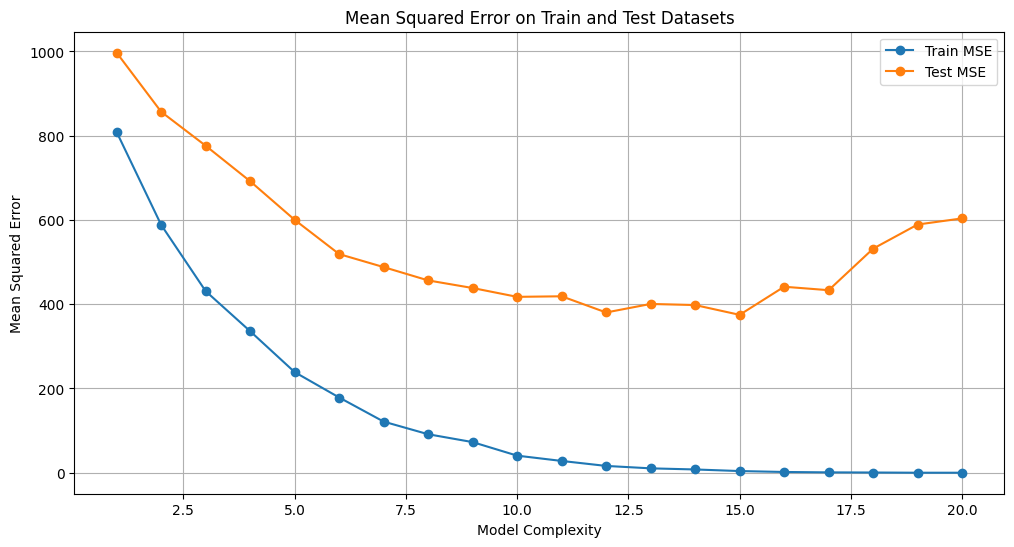

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(values, train_errors, marker='o', label='Train MSE')
plt.plot(values, test_errors, marker='o', label='Test MSE')
plt.xlabel('Model Complexity')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error on Train and Test Datasets')
plt.legend()
plt.grid(True)
plt.show()


# **GRADIENT BOOSTING REGRESSOR WITHOUT PYTHON LIBRARIES**

In [19]:
import numpy as np
import pandas as pd
from typing import Dict, List, Tuple
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

## gradient boost tree regressor ##
class GradientBoostTreeRegressor(object):
    def __init__(self, n_elements: int = 100, max_depth: int = 1,
                 min_samples_split: int = 2, learning_rate: float = 0.1) -> None:
        self.max_depth = max_depth
        self.n_elements = n_elements
        self.min_samples_split = min_samples_split
        self.learning_rate = learning_rate
        self.f = []
        self.regions = []
        self.gammas = []
        self.mean_loss = []
        self.e0 = 0

     #private function to group data points & compute gamma parameters
    def __compute_gammas(self, yp : np.array, y_train : np.array, e : np.array) -> Tuple[np.array,Dict]:
        #initialise global gamma array
        gamma_jm = np.zeros((y_train.shape[0]))
        #iterate through each unique predicted value/region
        regions = np.unique(yp)
        gamma   = {}
        for r in regions:
            #compute index for r
            idx = yp == r
            #isolate relevant data points
            e_r = e[idx]
            y_r = y_train[idx]
            #compute the optimal gamma parameters for region r
            gamma_r = np.median(y_r - e_r)
            #populate the global gamma array
            gamma_jm[idx] = gamma_r
            #set the unique region <-> gamma pairs
            gamma[r] = gamma_r
        #append the regions to internal storage
        self.regions.append(regions)
        #return
        return((gamma_jm,gamma))

        #public function to train the ensemble
    def fit(self, X_train: np.array, y_train: np.array) -> None:
      self.f = []
      self.regions = []
      self.mean_loss = []
      e0 = np.median(y_train)
      self.e0 = np.copy(e0)
      e = np.ones(y_train.shape[0]) * e0

      for _ in range(self.n_elements):
          self.mean_loss.append(np.mean(np.abs(y_train - e)))
          g = np.sign(y_train - e)

          model = DecisionTreeRegressor(max_depth=self.max_depth,
                                      min_samples_split=self.min_samples_split)
          model.fit(X_train, g)

          yp = model.predict(X_train)
          gamma_jm, gamma = self.__compute_gammas(yp, y_train, e)

          e += gamma_jm
          self.f.append(model)
          self.gammas.append(gamma)



     #public function to generate predictions
    def predict(self, X_test : np.array) -> np.array:
        #initialise predictions
        y_pred = np.ones(X_test.shape[0]) * np.copy(self.e0)
        #cycle through each element in the ensemble
        for model,gamma,regions in zip(self.f,self.gammas,self.regions):
            #produce predictions using model
            y = model.predict(X_test)
            #cycle through each unique leaf node for model m
            for r in regions:
                #updates for region r
                idx = y == r
                y_pred[idx] += gamma[r]
        #return predictions
        return(y_pred)

    #public function to return mean training loss
    def get_loss(self) -> List:
        return(self.mean_loss)

    #public function to return model parameters
    def get_params(self, deep: bool = False) -> Dict:
      return {'n_elements': self.n_elements,
            'max_depth': self.max_depth,
            'min_samples_split': self.min_samples_split,
            'learning_rate': self.learning_rate}




In [20]:
from sklearn.model_selection import train_test_split
#loading the data
df = pd.read_csv('/content/salary_data_cleaned.csv')
df_model=df[['Rating','Location','Size','Type of ownership','Industry','Sector','Revenue','hourly','employer_provided','avg_salary',
       'same_state','age','python_yn','spark','aws','excel','Job Title','math', 'engineering', 'data analysis', 'AI']]
df_dum = pd.get_dummies(df_model)
X, y = df_dum.drop('avg_salary', axis=1), df_dum.avg_salary.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=13)

In [21]:
## train the gradient boost regressor with default max_depth ##
rgr = GradientBoostTreeRegressor(n_elements=100)
rgr.fit(X,y)
## collect loss ##
loss1 = rgr.get_loss()

## train the gradient boost regressor with max_depth = 2 ##
rgr = GradientBoostTreeRegressor(n_elements=100, max_depth=2)
rgr.fit(X, y)
## collect loss ##
loss2 = rgr.get_loss()

## train the gradient boost regressor with max_depth = 3 ##
rgr = GradientBoostTreeRegressor(n_elements=100, max_depth=3)
rgr.fit(X, y)
## collect loss ##
loss3 = rgr.get_loss()

## train the gradient boost regressor with max_depth = 4 ##
rgr = GradientBoostTreeRegressor(n_elements=100, max_depth=4)
rgr.fit(X, y)
## collect loss ##
loss4 = rgr.get_loss()

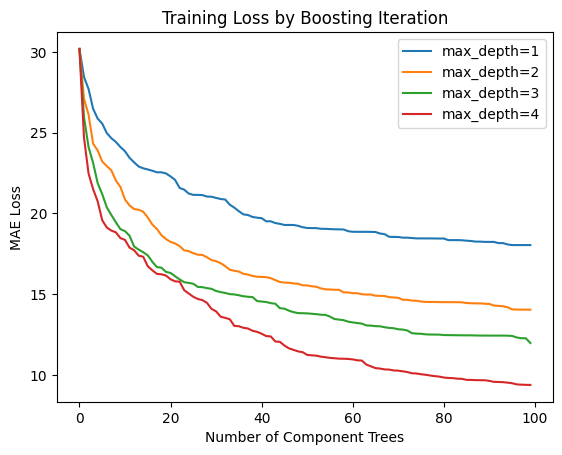

In [22]:
## plot different training losses ##
plt.plot(loss1,label='max_depth=1')
plt.plot(loss2,label='max_depth=2')
plt.plot(loss3,label='max_depth=3')
plt.plot(loss4,label='max_depth=4')
plt.title('Training Loss by Boosting Iteration')
plt.xlabel('Number of Component Trees')
plt.ylabel('MAE Loss')
plt.legend()
plt.show()

**PERFORMANCE METRICS**

In [23]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,make_scorer, r2_score

# Example usage
rgr = GradientBoostTreeRegressor(n_elements=500, max_depth=4, min_samples_split=5, learning_rate=0.01)


rgr.fit(X_train, y_train)
#cross validate
mse = mean_squared_error(y_test, rgr.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
mae = mean_absolute_error(y_test, rgr.predict(X_test))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
rmse = np.sqrt(mse)
print("The root mean square error (rmse) on test set: {:.4f}".format(rmse))
coeffofdet = r2_score(y_test, rgr.predict(X_test))
print("The Coefficient Of Determination on test set: {:.4f}".format(coeffofdet))
mape = (100 / len(y_test)) * np.sum(np.abs((y_test - rgr.predict(X_test)) / y_test))
print("The Mean Absolute Percentage Error on test set: {:.4f}".format(mape))

The mean squared error (MSE) on test set: 797.1567
The mean absolute error (MAE) on test set: 15.1647
The root mean square error (rmse) on test set: 28.2340
The Coefficient Of Determination on test set: 0.5754
The Mean Absolute Percentage Error on test set: 13.3747
